In [1]:
from PIL import Image, ImageDraw
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
source_path = '/content/drive/MyDrive/Colab Notebooks/augment/*'

In [4]:
images_paths = glob.glob(source_path)

In [5]:
class_name = ['Gingivits', 'Cold_Sores', 'Canker_Sores', 'Periodontitis', 'Receding_Gum', 'abfraction', 'Thrush', 'Gingival_Cyst']

In [6]:
images_paths

['/content/drive/MyDrive/Colab Notebooks/augment/Gingivits',
 '/content/drive/MyDrive/Colab Notebooks/augment/Canker Sores',
 '/content/drive/MyDrive/Colab Notebooks/augment/Cold Sores',
 '/content/drive/MyDrive/Colab Notebooks/augment/Receding Gum',
 '/content/drive/MyDrive/Colab Notebooks/augment/abfraction',
 '/content/drive/MyDrive/Colab Notebooks/augment/Periodontitis',
 '/content/drive/MyDrive/Colab Notebooks/augment/Thrush',
 '/content/drive/MyDrive/Colab Notebooks/augment/Gingival Cyst']

In [7]:
eight_class = []
class_volume = []

In [8]:
for i in images_paths:
    images = glob.glob( i +'/*.jpeg')
    class_volume.append(len(images))
    eight_class.append(images)

In [9]:
len(eight_class)

8

In [10]:
images = []
labels = []

In [11]:
class_volume

[351, 220, 264, 352, 329, 440, 220, 274]

In [12]:
import matplotlib.ticker as ticker

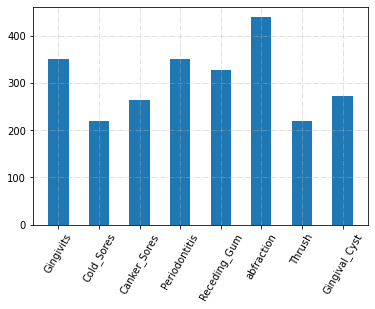

In [13]:
plt.figure()
x = np.arange(8)
y = class_volume
plt.bar(x, y, width=0.5, tick_label=class_name)
plt.grid(linestyle='-.',alpha=0.5)
plt.xticks(x, class_name, rotation = 60)
plt.show()

In [14]:
for classIndex in range(len(eight_class)):
    for imagefile in eight_class[classIndex]:
        image = Image.open(imagefile).resize((90,90))
        image = image = np.asarray(image)/255.0
        images.append(image)
        labels.append(classIndex)

In [15]:
images = np.array(images)
labels = np.array(labels)

In [16]:
encoder = LabelBinarizer()
labels_onehot = encoder.fit_transform( labels )

In [17]:
images.shape,  labels_onehot.shape

((2450, 90, 90, 3), (2450, 8))

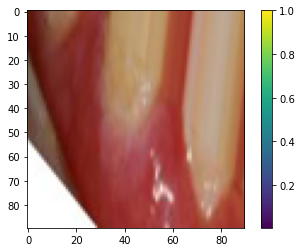

In [18]:
plt.figure()
plt.imshow(images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [27]:
x_train, x_test, y_train, y_test = train_test_split( images, labels, test_size=0.2 )

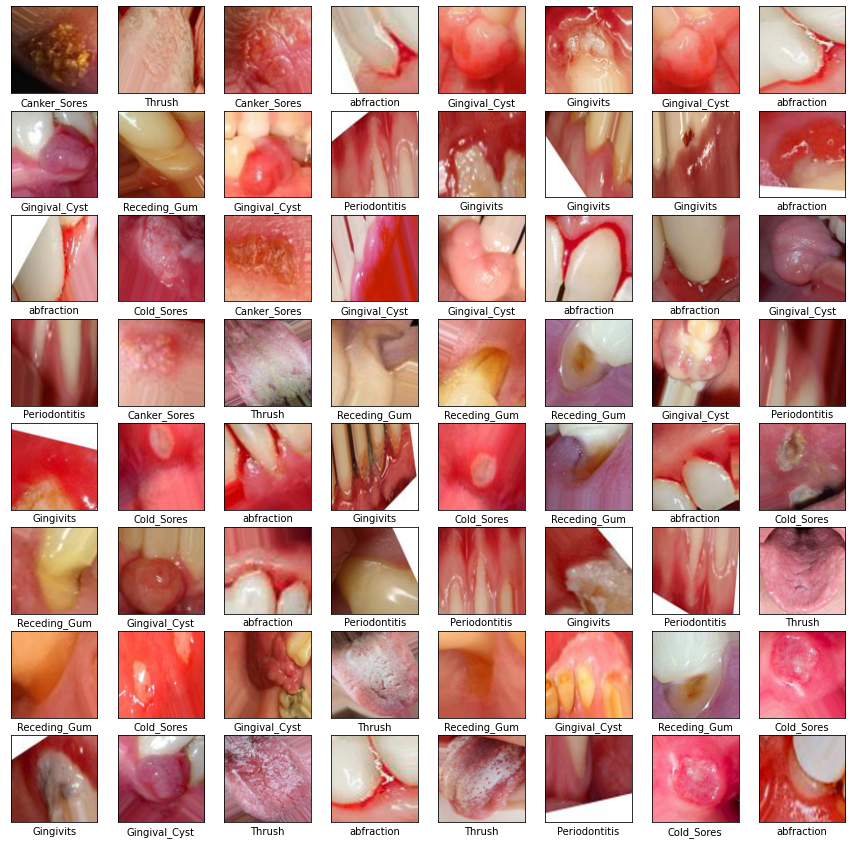

In [20]:
plt.figure(figsize=(15,15))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.array(x_train)[i])
    plt.xlabel(np.array(class_name)[np.array(y_train)[i]])
plt.show()

In [28]:
x_train, x_test, y_train, y_test = train_test_split( images, labels, test_size=0.2 )

In [29]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1960, 90, 90, 3) (490, 90, 90, 3) (1960,) (490,)


In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Activation('softmax'),
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
56/56 [==============================] - 23s 404ms/step - loss: 1.7980 - accuracy: 0.3747 - val_loss: 1.6653 - val_accuracy: 0.4127
Epoch 2/20
56/56 [==============================] - 22s 399ms/step - loss: 1.1171 - accuracy: 0.5884 - val_loss: 1.3745 - val_accuracy: 0.5102
Epoch 3/20
56/56 [==============================] - 22s 402ms/step - loss: 0.8401 - accuracy: 0.7029 - val_loss: 1.0808 - val_accuracy: 0.6236
Epoch 4/20
56/56 [==============================] - 22s 393ms/step - loss: 0.5687 - accuracy: 0.8050 - val_loss: 0.7962 - val_accuracy: 0.7234
Epoch 5/20
56/56 [==============================] - 22s 392ms/step - loss: 0.4776 - accuracy: 0.8367 - val_loss: 0.7984 - val_accuracy: 0.7392
Epoch 6/20
56/56 [==============================] - 22s 394ms/step - loss: 0.3088 - accuracy: 0.9002 - val_loss: 0.7005 - val_accuracy: 0.7528
Epoch 7/20
56/56 [==============================] - 22s 394ms/step - loss: 0.2248 - accuracy: 0.9263 - val_loss: 0.5272 - val_accuracy: 0.8005

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 90, 90, 3)        12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 90, 90, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 45, 45, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                        

In [25]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

8/8 - 1s - loss: 0.8291 - accuracy: 0.8612 - 700ms/epoch - 87ms/step

Test accuracy: 0.8612244725227356


## Data Augmentation

In [30]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(90, 90, 3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [37]:
model = tf.keras.models.Sequential([
    data_augmentation,                                
    tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Activation('softmax'),
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=200, validation_split=0.2)

Epoch 1/200
49/49 [==============================] - 25s 487ms/step - loss: 1.7703 - accuracy: 0.3616 - val_loss: 1.8390 - val_accuracy: 0.2602
Epoch 2/200
49/49 [==============================] - 21s 433ms/step - loss: 1.1673 - accuracy: 0.5727 - val_loss: 1.6552 - val_accuracy: 0.4260
Epoch 3/200
49/49 [==============================] - 21s 434ms/step - loss: 0.8624 - accuracy: 0.6792 - val_loss: 1.3803 - val_accuracy: 0.4668
Epoch 4/200
49/49 [==============================] - 21s 435ms/step - loss: 0.7132 - accuracy: 0.7392 - val_loss: 1.0583 - val_accuracy: 0.6327
Epoch 5/200
49/49 [==============================] - 21s 435ms/step - loss: 0.6839 - accuracy: 0.7494 - val_loss: 0.8219 - val_accuracy: 0.7168
Epoch 6/200
49/49 [==============================] - 21s 436ms/step - loss: 0.5903 - accuracy: 0.7870 - val_loss: 0.7276 - val_accuracy: 0.7194
Epoch 7/200
49/49 [==============================] - 21s 436ms/step - loss: 0.5233 - accuracy: 0.8112 - val_loss: 0.6031 - val_accuracy:

In [38]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 90, 90, 3)         0         
                                                                 
 batch_normalization_3 (Batc  (None, 90, 90, 3)        12        
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 90, 90, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 22, 22, 64)      

In [39]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

16/16 - 1s - loss: 0.2918 - accuracy: 0.9510 - 1s/epoch - 88ms/step

Test accuracy: 0.9510204195976257


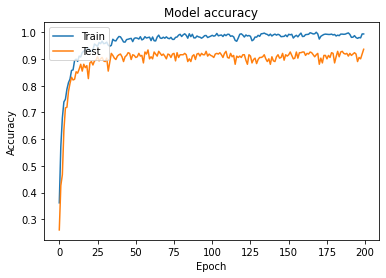

In [40]:
# 绘制训练 & 验证的准确率值
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

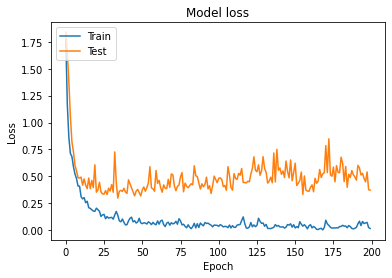

In [41]:
# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()